<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Semana_7_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo de modelos

* Un modelo puede pensarse como una ecuación matemática que puede ser usada para predecir un valor en base a uno o más valores.
* Relacionando una o más variables independientes a las variables dependientes.

Por ejemplo si tenemos como entrada las **millas por galón en carretera**, el modelo puede predecir un precio adecuado para el carro. 



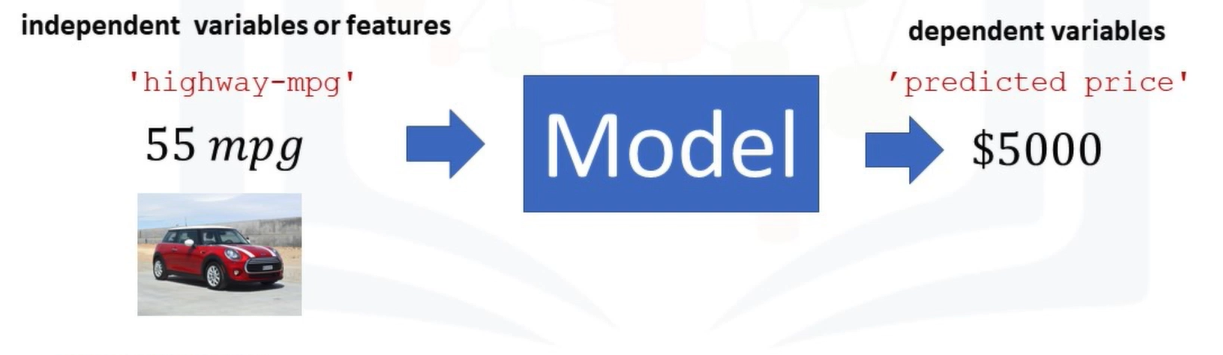

* Usualmente mientras más relevantes sean los datos, más preciso será el modelo

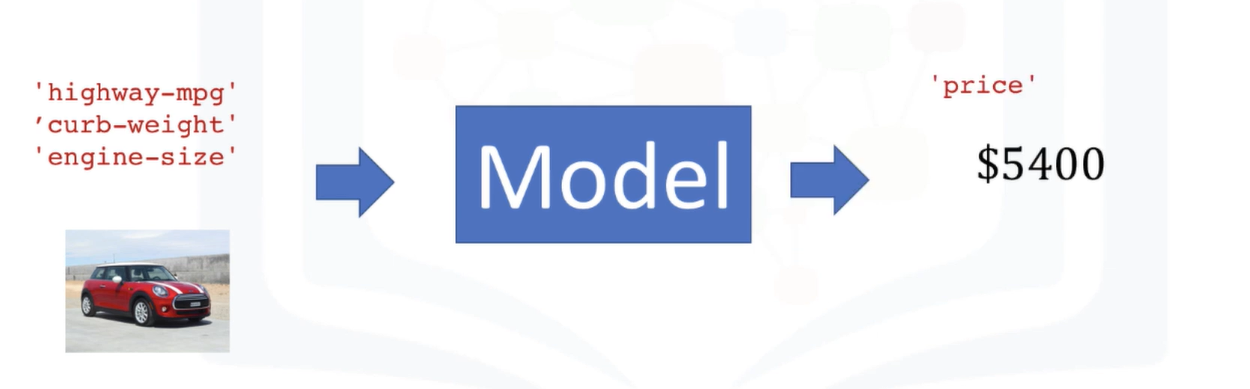

* Para entender porque contar con más datos es importante, considera la siguiente situación: 

1. Tienes que vender dos carros idénticos
2. Los carros rosas se venden por menos dinero.

Si por ejemplo en nuestro modelo no consideramos el color, nuestro modelo le asignará el mismo precio a dos carros de diferente color.

A parte de conseguir más datos, se puede probar diferentes modelos.

# Regresión lineal y Regresión lineal múltiple

* La regresión lineal se refiere a una variable independiente que hace una predicción.
* La regresión lineal múltiple se refiere a múltiples variables independientes que hacen una predicción.

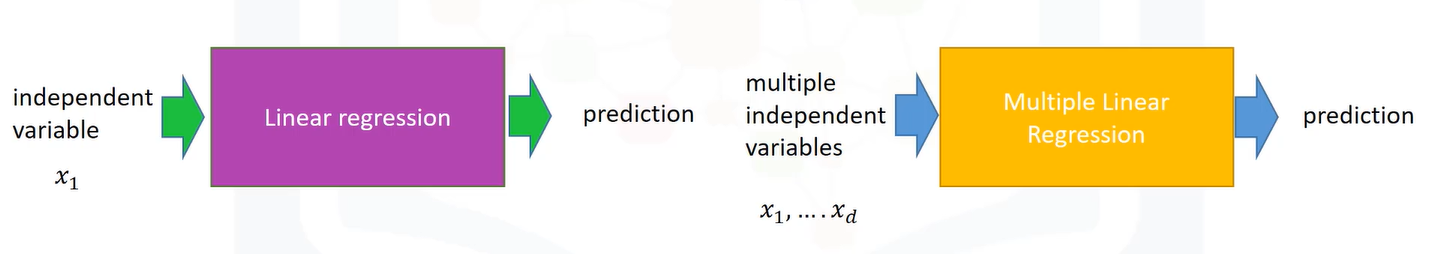

## Regresión lineal simple
Es un método para ayudarnos a entender mejor la relación entre 2 variables: El predictor (independiente) variable x, y el objetivo (dependiente) variable y.

Estará dado por la siguiente fórmula:

${y = b_0 + b_1 x}$

* ${b_o}$: **el intercepto**
* ${b_1}$: **la pendiente**

Cuando entrenemos o ajustemos el modelo, nosotros usaremos estos parámetros, con el ejemplo de antes, si asumimos que existe una relación lineal entre las variables, podemos usar esta relación para formular un modelo que determine el precio del carro. Supongamos que existe una relación lineal entre la variable **Highway Miles per Gallon** y  el **costo de un auto**. Con base a esto podemos crear un modelo que prediga el precio de un carro.

Para determinar la línea, tomamos puntos de datos de nuestro data set y los marcamos en rojo.

Entonces los utilizamos los puntos de entrenamiento para ajustar el modelo, el resulto de los puntos de entrenamiento son los parámetros.

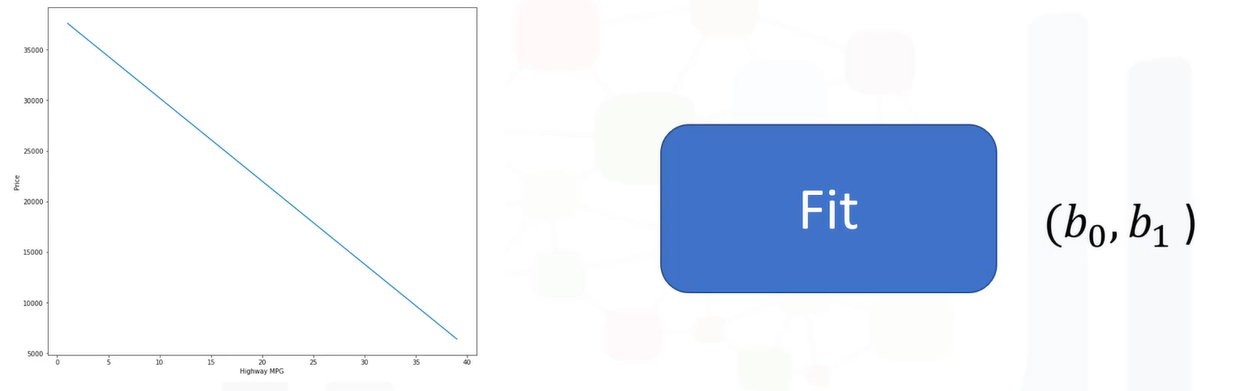

El valor que queremos predecir se llama el **target** y lo guardamos en la variable **y**, guardamos la variable dependiente en la variable **y**.

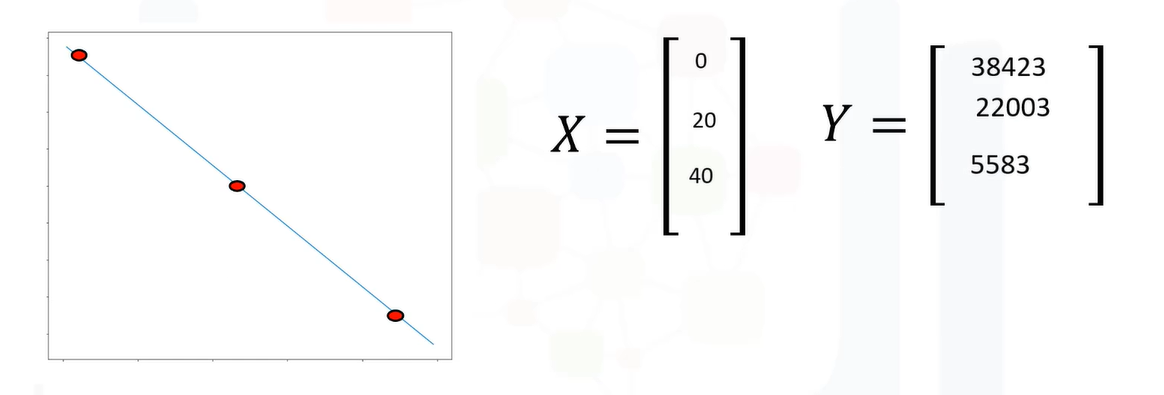

En muchos casos, una gran cantidad de factores afectan para saber cuanto va a pagar una persona por un auto, en el modelo se deberá tomar está incertidumbre en cuenta al asumir un valor aleatorio que esa añadido al punto en la línea.

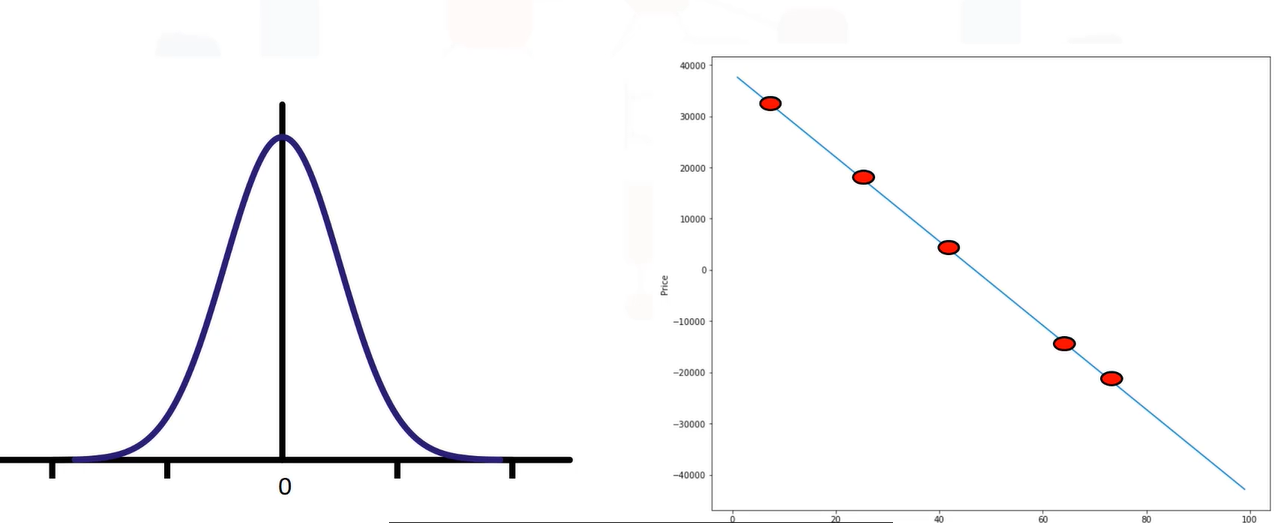

El eje vertical muestra el valor agregado y el eje horizontal la probabilidad de que el valor sea agregado.

Podemos resumir el proceso como sigue:
* Tenemos un conjunto de puntos de entrenamiento.
* Usamos esos puntos de enetrenamiento para entrenar o ajustar el modelo y obtener los parámetros.
* Usamos los parámetros en el modelo.
* Ahora tenemos un modelo; usamos un hat arriba de la y para indicar que es un estimado.
* Podemos usar este modelo para predecir valores que no hemos visto.

Para ajustar un modelo en Python primero debemos importar el modelo lineal de scikit-lear

In [1]:
from sklearn.linear_model import LinearRegression

Crear un objeto de regresión lineal usando el constructor:

In [2]:
lm=LinearRegression()

Definimos la variable predictora y la variable objetivo

In [3]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)

In [4]:
df["horsepower"]=df["horsepower"].replace("?",111) #reemplazamos valores faltantes
df["horsepower"]=df["horsepower"].astype("int")
df["peak-rpm"]=df["peak-rpm"].replace("?",5000) #reemplazamos valores faltantes
df["peak-rpm"]=df["peak-rpm"].astype("int")
df.price=df["price"].replace("?",13950) #reemplazamos valores faltantes
df["price"]=df["price"].astype("int")

In [5]:
X=df[["highway-mpg"]] #variable predictora
Y=df[["price"]] #variable objetivo

Después usamos


```
lm.fit(X,Y) 
```
para ajustar el modelo y encontrar los parámetros de ${b_0}$ y ${b_1}$



In [6]:
lm.fit(X,Y)

LinearRegression()

Podemos obtener una predicción usando el método **predict**

In [7]:
Yhat=lm.predict(X)

El resultado es un array, este array tiene el mismo número de muestras que la entrada X

Podemos ver el intercepto ${b_0}$, el cual es un atributo del objeto **lm**

In [8]:
lm.intercept_

array([37454.46949477])

Podemos ver también la pendiente ${b_1}$

In [9]:
lm.coef_

array([[-788.02875102]])

La relación entre **Price** y **Highway MPG** está dada por:

${Price = 37454.46 - 788.02 * highway-mpg}$

Si observamos con detenimiento obtenemos la misma ecuación de antes

${\hat{Y} = b_0 + b_1x}$

## Regresión lineal múltiple (RLM)

Este método es usado para explicar la relación entre:
* Una variable objetivo continua (Y)
* Dos o más variables predictoras (X)

Si tenemos por ejemplo 4 vriables predictoras:

${\hat{Y}=b_0+b_1x_1+b_2x_2+b_3x_3+b_4x_4}$

* ${b_0}$: intercepto (X=0)
* ${b_1}$: el coeficiente o parámetro de ${x_1}$
* ${b_2}$: el coeficiente o parámetro de ${x_2}$ y así en adelante...


Graficamente se representa de la siguiente manera:

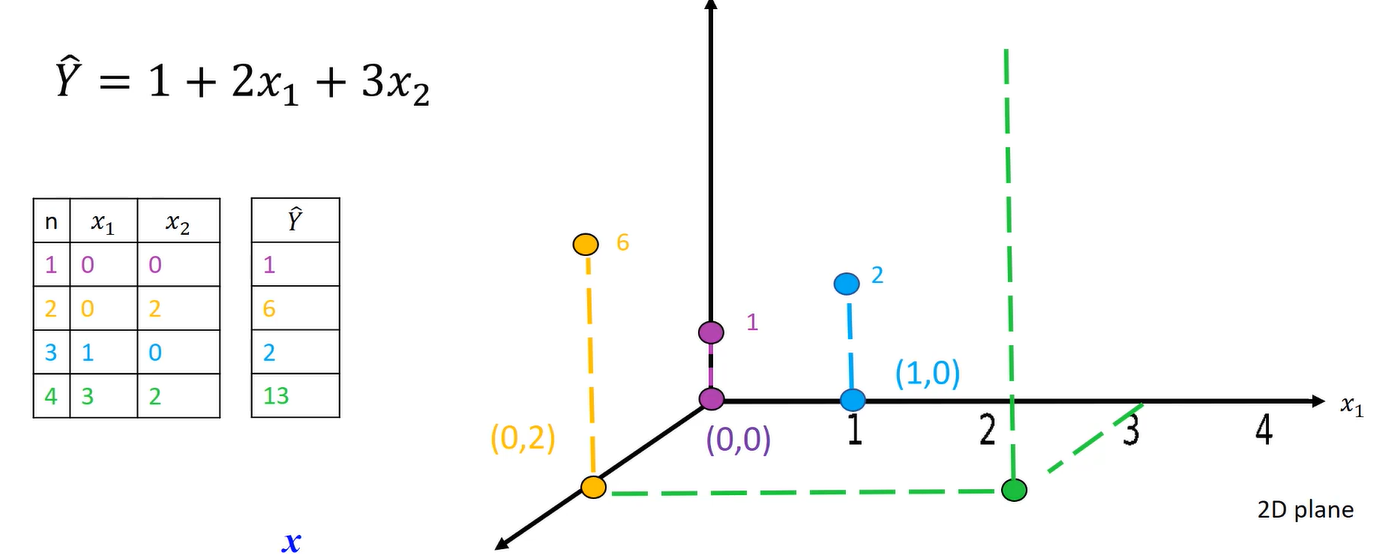

Podemos ajustar la regresión lineal múltiple como sigue: 

1. Extraemos las 4 variables predictoas y las guardamos en la variable Z

In [10]:
Z=df[["horsepower","curb-weight","engine-size","highway-mpg"]]

2. Entrenamos el modelo como antes:

In [11]:
lm.fit(Z,df["price"])

LinearRegression()

3. Obtenemos la predicción:

In [12]:
Yhat=lm.predict(Z)

En este caso las entradas son un array o dataframe con 4 columnas, el número de filas corresponde al número de muestras.

La salida es un array con el mismo número de elementos que el número de muestras.

Para encontrar el intercepto y los coeficientes hacemos lo mismo que con la regresión lineal sencilla.



In [13]:
lm.intercept_

-9554.007675922367

In [14]:
lm.coef_

array([ 19.33410382,   3.84632117, 100.44133113, -59.10680298])

Modelo lineal estimado:
${Price= -9554 + (19.33)*horsepower+(4.70)*curb-weigth+(81.96) * engine-size+(33.58)*highway-mpg}$

Esta forma es idéntica a la de RLS

${\hat{Y}=b_0+b_1x_1+b_2x_2+b_3x_3+b_4x_4}$

# Evaluación del modelo usando la visualización

#Gráfico de regresión

Es bueno para darnos un estimado de:
1. La relación entre 2 variables
2. La fuerza de la correlación
3. La dirección de la relación (positiva o negativa)

Nos muestra la combinación de:
* El scatterplot: donde cada punto representa una y diferente
* La línea de regresión lineal ajustada (${\hat{y}}$).

Una forma de graficar es con regplot:

(0.0, 48122.18107154368)

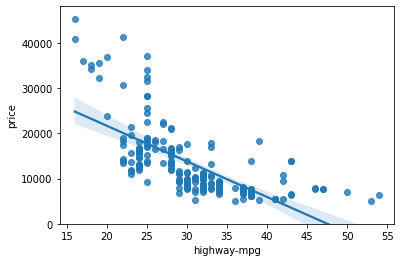

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="highway-mpg", #predictor
            y="price", #target
            data=df) #dataframe
plt.ylim(0,)

Otra forma es con un gráfico de residuos, el cuál se ejemplifica a continuación:

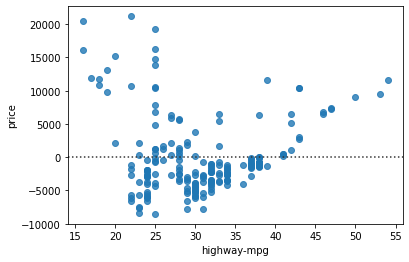

In [21]:
sns.residplot(x="highway-mpg", #predictor
              y="price",#target
              data=df)  #df

## Gráfico de distribución
Este tipo de gráfico cuenta el valor predecido versus el valor real. Estos modelos son extremadamente útiles para visualizar modelos con más de una variable independiente o feature.

Por ejemplo al comparar los gráficos de distribución:

* Los valores ajustados que provienen del modelo
* Los valores actuales

Para hacer el código en Python se hace lo siguiente:

In [28]:
import warnings
warnings.filterwarnings("ignore")

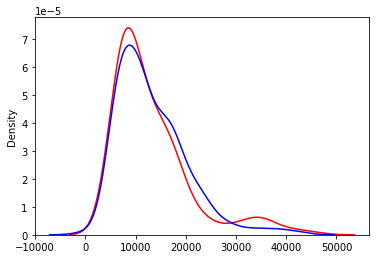

In [31]:
ax1=sns.distplot(x=df["price"],
                 hist=False, #queremos un gráfico de distribución no un histograma
                 color="r",
                 label="Valor real")

sns.distplot(Yhat,hist=False,color="b",label="Valores de la predicción",ax=ax1) #creamos un segundo plot con los datos predichos

# Regresión polinomial y pipelines

Una regresión polinomial es un caso especial de la regresión lineal, este método es benéfico para describir relaciones curvilíneas.

* El modelo puede ser cuadrático:

${\hat{Y}=b_0+b_1x_1+b_2(x_1)^2}$

* Cúbico:

${\hat{Y}=b_0+b_1x_1+b_2(x_1)^2+b_3(x_1)^3}$

* Orden mayor:

${\hat{Y}=b_0+b_1x_1+b_2(x_1)^2+b_3(x_1)^3+..}$

Para calcular una regresión polinomial de tercer orden hacemos lo siguiente:

In [37]:
import numpy as np
x=df["highway-mpg"]
y=df["price"]
f=np.polyfit(x,y,3)
p=np.poly1d(f)

Podemos imprimir nuestro modelo con un print

In [38]:
print(p)

        3         2
-1.649 x + 214.3 x - 9259 x + 1.405e+05


## Regresión polinomial con más de una dimensión

* Podemos tener una regresión polinomial linear multidimensional, el cual se puede expresar de la siguiente manera:

${\hat{Y}+b0+b1X_1+b2X_2+b3X_1X_2+b4(X_1)^2+b5(X_2)^2+..}$

La función np.polyfit no puede desarrollar este tipo de regresión, para ello se usa la librería **preprocessing** de scikit-learn

In [40]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2,include_bias=False) #número de grados

In [43]:
x_polly=pr.fit_transform(df[["horsepower","curb-weight"]]) #ajustamos y transformamos las 2 features

A medida que se usan más variables resultará conveniente 